best_depth: 5
decision tree:
accuracy on the training subset:0.995
accuracy on the test subset:0.951
Feature importances:[0.         0.01991644 0.         0.         0.01378831 0.
 0.         0.         0.         0.         0.0099313  0.04713547
 0.         0.00243002 0.00235257 0.         0.         0.
 0.         0.         0.70786451 0.03236422 0.         0.00680904
 0.         0.         0.01771345 0.1281193  0.01157537 0.        ]


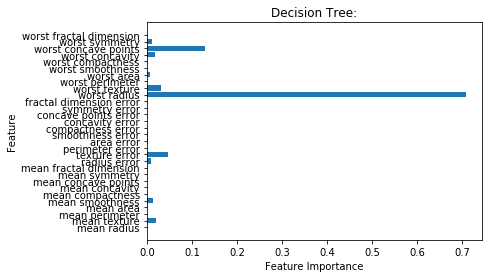

In [6]:
import csv,pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import pydotplus 
from IPython.display import Image
import graphviz
from sklearn.tree import export_graphviz
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

cancer=load_breast_cancer()

featureNames=cancer.feature_names
#random_state 相当于随机数种子
X_train,x_test,y_train,y_test=train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=42)

list_average_accuracy=[]
depth=range(1,30)
for i in depth:
    #max_depth=4限制决策树深度可以降低算法复杂度，获取更精确值
    tree= DecisionTreeClassifier(max_depth=i,random_state=0)
    tree.fit(X_train,y_train)
    accuracy_training=tree.score(X_train,y_train)
    accuracy_test=tree.score(x_test,y_test)
    average_accuracy=(accuracy_training+accuracy_test)/2.0
    #print("average_accuracy:",average_accuracy)
    list_average_accuracy.append(average_accuracy)

max_value=max(list_average_accuracy)
#索引是0开头，结果要加1
best_depth=list_average_accuracy.index(max_value)+1
print("best_depth:",best_depth)

best_tree= DecisionTreeClassifier(max_depth=best_depth,random_state=0)
best_tree.fit(X_train,y_train)
accuracy_training=best_tree.score(X_train,y_train)
accuracy_test=best_tree.score(x_test,y_test)

print("decision tree:") 
print("accuracy on the training subset:{:.3f}".format(best_tree.score(X_train,y_train)))
print("accuracy on the test subset:{:.3f}".format(best_tree.score(x_test,y_test)))
print('Feature importances:{}'.format(best_tree.feature_importances_))
#绘图，显示因子重要性
n_features=cancer.data.shape[1]
plt.barh(range(n_features),best_tree.feature_importances_,align='center')
plt.yticks(np.arange(n_features),cancer.feature_names)
plt.title("Decision Tree:")
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

#生成一个dot文件，以后用cmd形式生成图片
export_graphviz(tree,out_file="cancertree.dot",class_names=['malignant','benign'],feature_names=cancer.feature_names,impurity=False,filled=True)